In [1]:
from edgedroid.models.timings import *

etm = EmpiricalETM(0.0, ttf_levels=4)
etm

In [2]:
import pandas as pd
from collections import deque

dfs = deque()
for state, exec_times in etm._views.items():
    df = pd.DataFrame(data=exec_times, columns=["exec_time"])
    df["state"] = state
    dfs.append(df)
    
data = pd.concat(dfs, ignore_index=True)
data["state"] = data["state"].astype("category")
data

,exec_time,state
0,4.438645,"(-inf, 1.2699261457753965]"
1,2.943222,"(-inf, 1.2699261457753965]"
2,5.405761,"(-inf, 1.2699261457753965]"
3,5.225161,"(-inf, 1.2699261457753965]"
4,4.780642,"(-inf, 1.2699261457753965]"
...,...,...
3375,5.564453,"(3.575587280726427, inf]"
3376,7.807866,"(3.575587280726427, inf]"
3377,19.379949,"(3.575587280726427, inf]"
3378,6.942622,"(3.575587280726427, inf]"


/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to

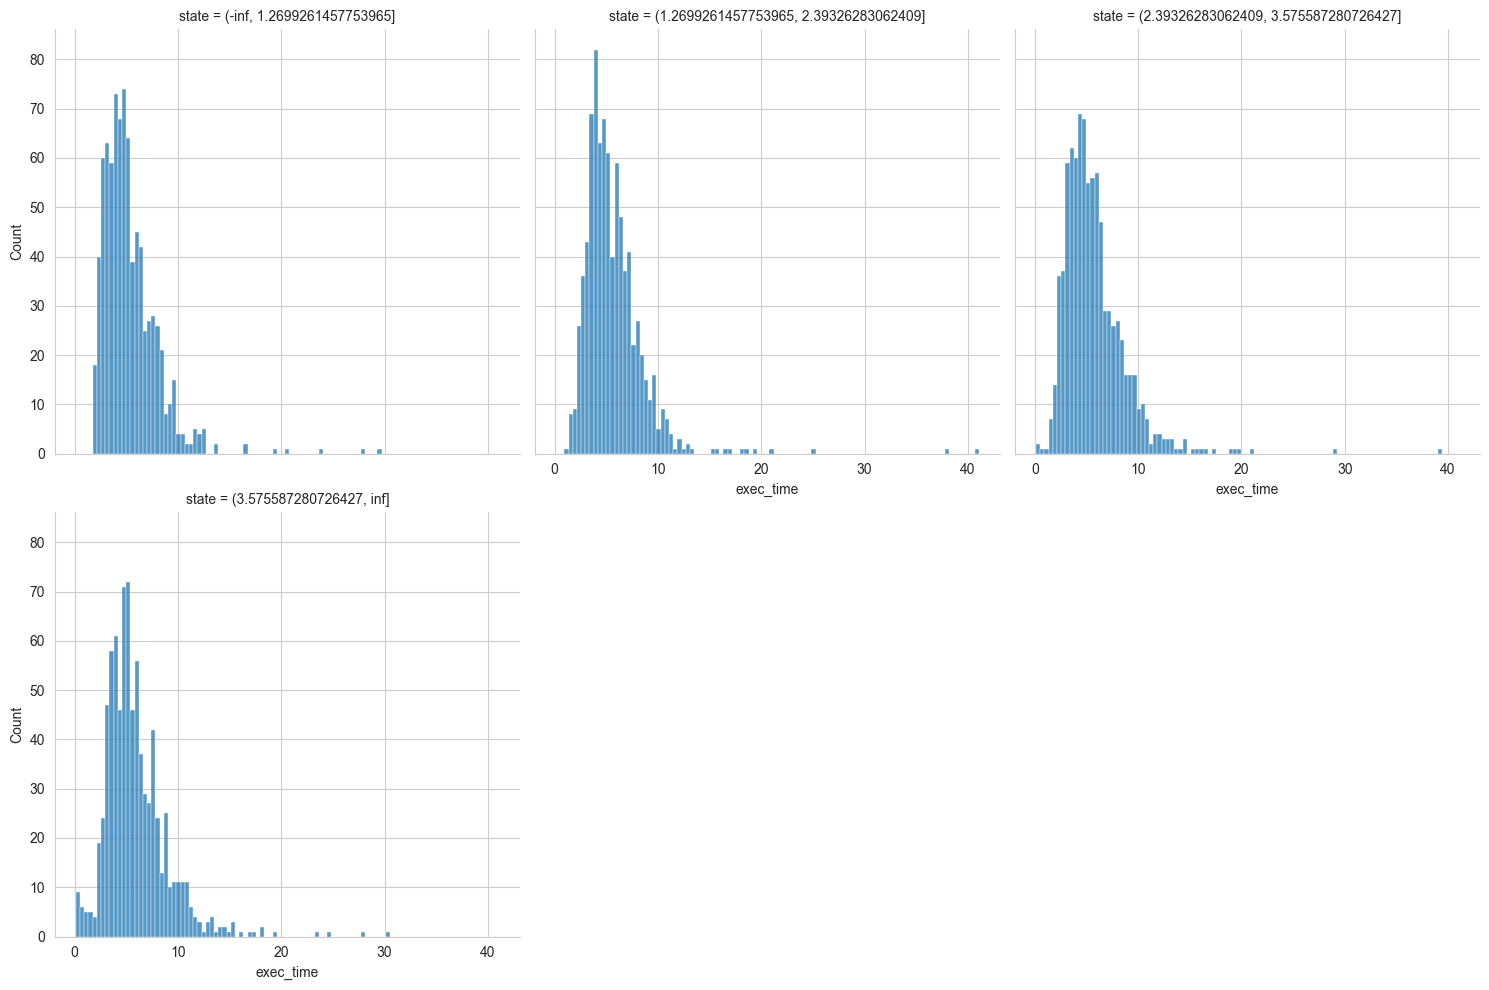

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.displot(data=data, x="exec_time", col="state", col_wrap=3, kind="hist")
plt.show()

In [4]:
desc = data.groupby("state").describe(percentiles=[0.05, 0.95])
desc

/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_46950/3262358750.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc = data.groupby("state").describe(percentiles=[0.05, 0.95])


exec_time                      \
                                           count      mean       std   
state                                                                  
(-inf, 1.2699261457753965]                 840.0  5.345496  2.712360   
(1.2699261457753965, 2.39326283062409]     846.0  5.677823  3.042629   
(2.39326283062409, 3.575587280726427]      874.0  5.730882  3.045354   
(3.575587280726427, inf]                   820.0  5.928326  3.118523   

                                                                      \
                                             min        5%       50%   
state                                                                  
(-inf, 1.2699261457753965]              1.812792  2.425589  4.799264   
(1.2699261457753965, 2.39326283062409]  1.303871  2.536282  5.104937   
(2.39326283062409, 3.575587280726427]   0.273121  2.433293  5.140988   
(3.575587280726427, inf]                0.123340  2.483971  5.296002   

                                                              
                                              95%        max  
state                                                         
(-inf, 1.2699261457753965]               9.694533  29.465998  
(1.2699261457753965, 2.39326283062409]   9.920956  41.053520  
(2.39326283062409, 3.575587280726427]   10.531124  39.141714  
(3.575587280726427, inf]                10.828769  30.155684

/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/categorical.py:641:

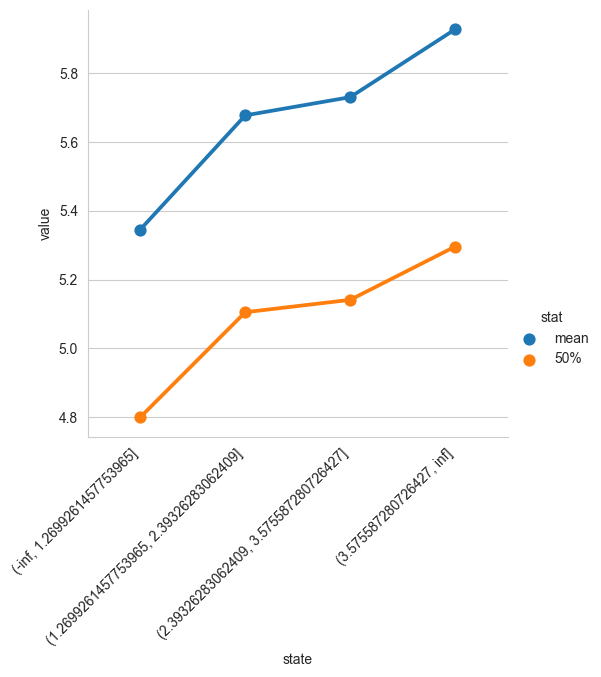

In [5]:
desc.columns = desc.columns.droplevel(0)
desc = desc[["mean", "50%"]].stack().reset_index().rename(columns={"level_1": "stat", 0: "value"})

fg = sns.catplot(desc, x="state", y="value", hue="stat", kind="point")
for ax in fg.axes.flat:
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [6]:
dfs = deque()
for state, exec_times in etm._views.items():
    # winsorize
    low_bound = np.percentile(exec_times, 5)
    high_bound = np.percentile(exec_times, 95)
    
    exec_times[exec_times > high_bound] = high_bound
    exec_times[exec_times < low_bound] = low_bound
    
    df = pd.DataFrame(data=exec_times, columns=["exec_time"])
    df["state"] = state
    dfs.append(df)

win_data = pd.concat(dfs, ignore_index=True)
win_data["state"] = win_data["state"].astype("category")
win_data

,exec_time,state
0,4.438645,"(-inf, 1.2699261457753965]"
1,2.943222,"(-inf, 1.2699261457753965]"
2,5.405761,"(-inf, 1.2699261457753965]"
3,5.225161,"(-inf, 1.2699261457753965]"
4,4.780642,"(-inf, 1.2699261457753965]"
...,...,...
3375,5.564453,"(3.575587280726427, inf]"
3376,7.807866,"(3.575587280726427, inf]"
3377,10.828769,"(3.575587280726427, inf]"
3378,6.942622,"(3.575587280726427, inf]"


/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to

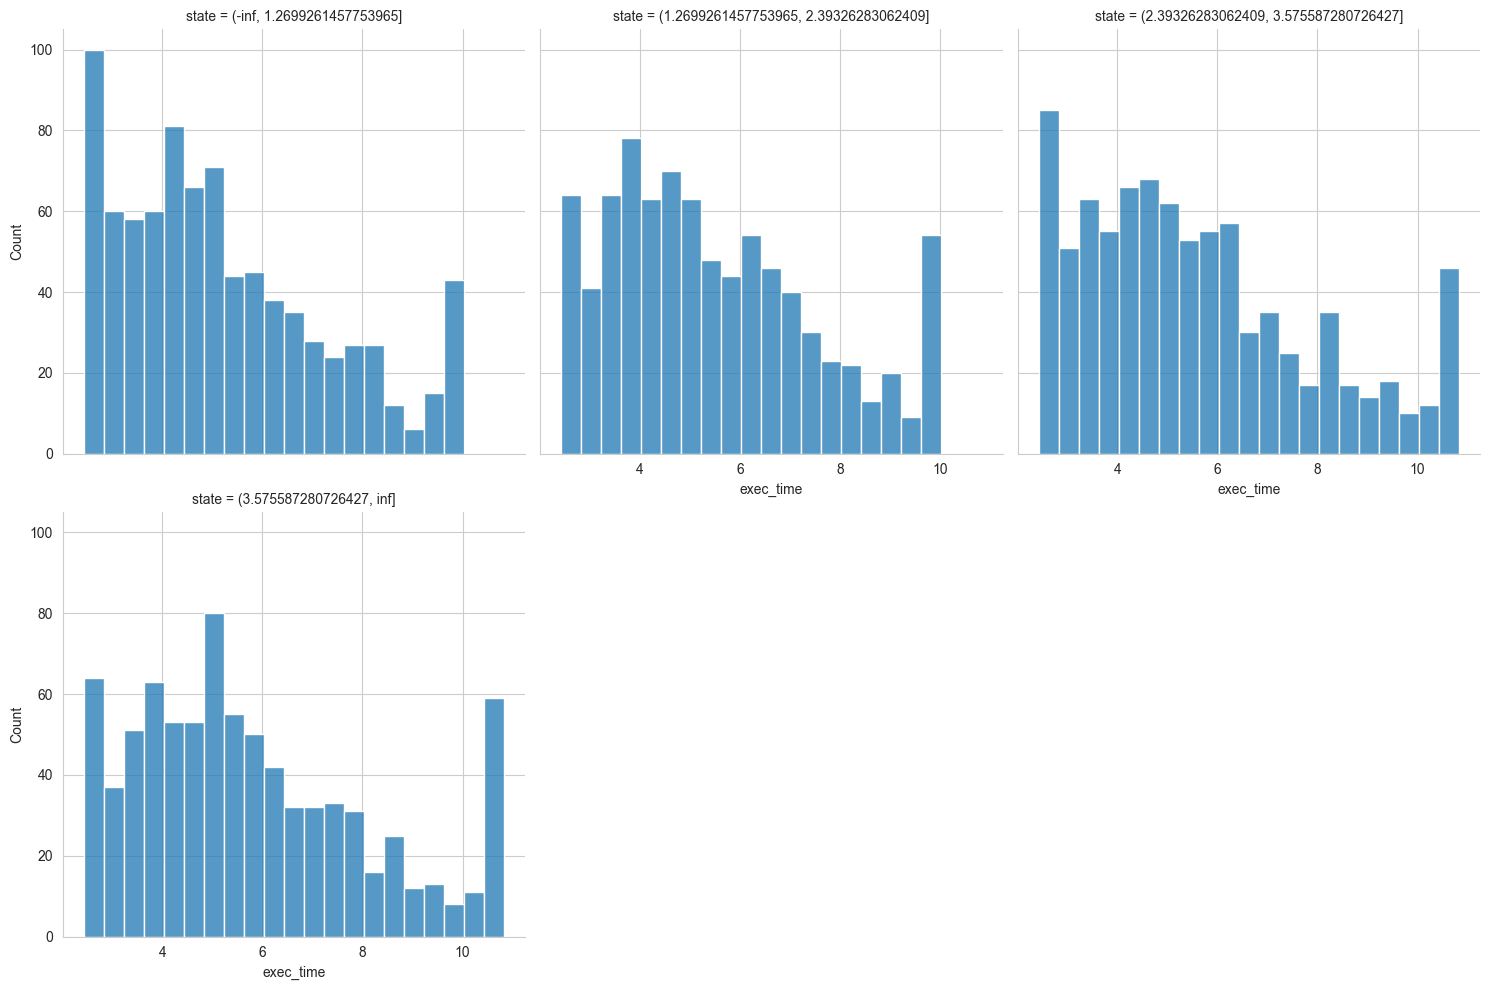

In [7]:
sns.displot(data=win_data, x="exec_time", col="state", col_wrap=3, kind="hist")
plt.show()

/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_46950/2643906123.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_desc = win_data.groupby("state").describe(percentiles=[0.05, 0.95])
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped

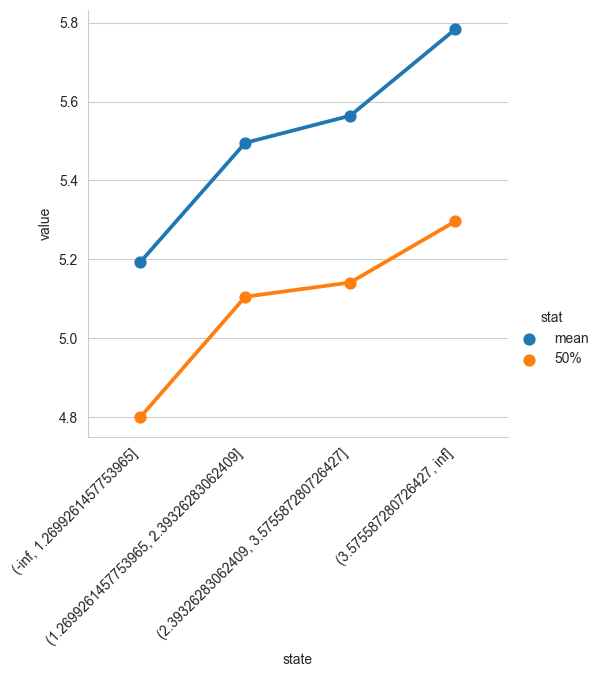

In [8]:
win_desc = win_data.groupby("state").describe(percentiles=[0.05, 0.95])
win_desc.columns = win_desc.columns.droplevel(0)
win_desc = win_desc[["mean", "50%"]].stack().reset_index().rename(columns={"level_1": "stat", 0: "value"})

fg = sns.catplot(win_desc, x="state", y="value", hue="stat", kind="point")
for ax in fg.axes.flat:
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [9]:
data["method"] = "raw"
win_data["method"] = "winsorized"

all_data = pd.concat((data, win_data))
all_data["method"] = all_data["method"].astype("category")
all_data

,exec_time,state,method
0,4.438645,"(-inf, 1.2699261457753965]",raw
1,2.943222,"(-inf, 1.2699261457753965]",raw
2,5.405761,"(-inf, 1.2699261457753965]",raw
3,5.225161,"(-inf, 1.2699261457753965]",raw
4,4.780642,"(-inf, 1.2699261457753965]",raw
...,...,...,...
3375,5.564453,"(3.575587280726427, inf]",winsorized
3376,7.807866,"(3.575587280726427, inf]",winsorized
3377,10.828769,"(3.575587280726427, inf]",winsorized
3378,6.942622,"(3.575587280726427, inf]",winsorized


/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to

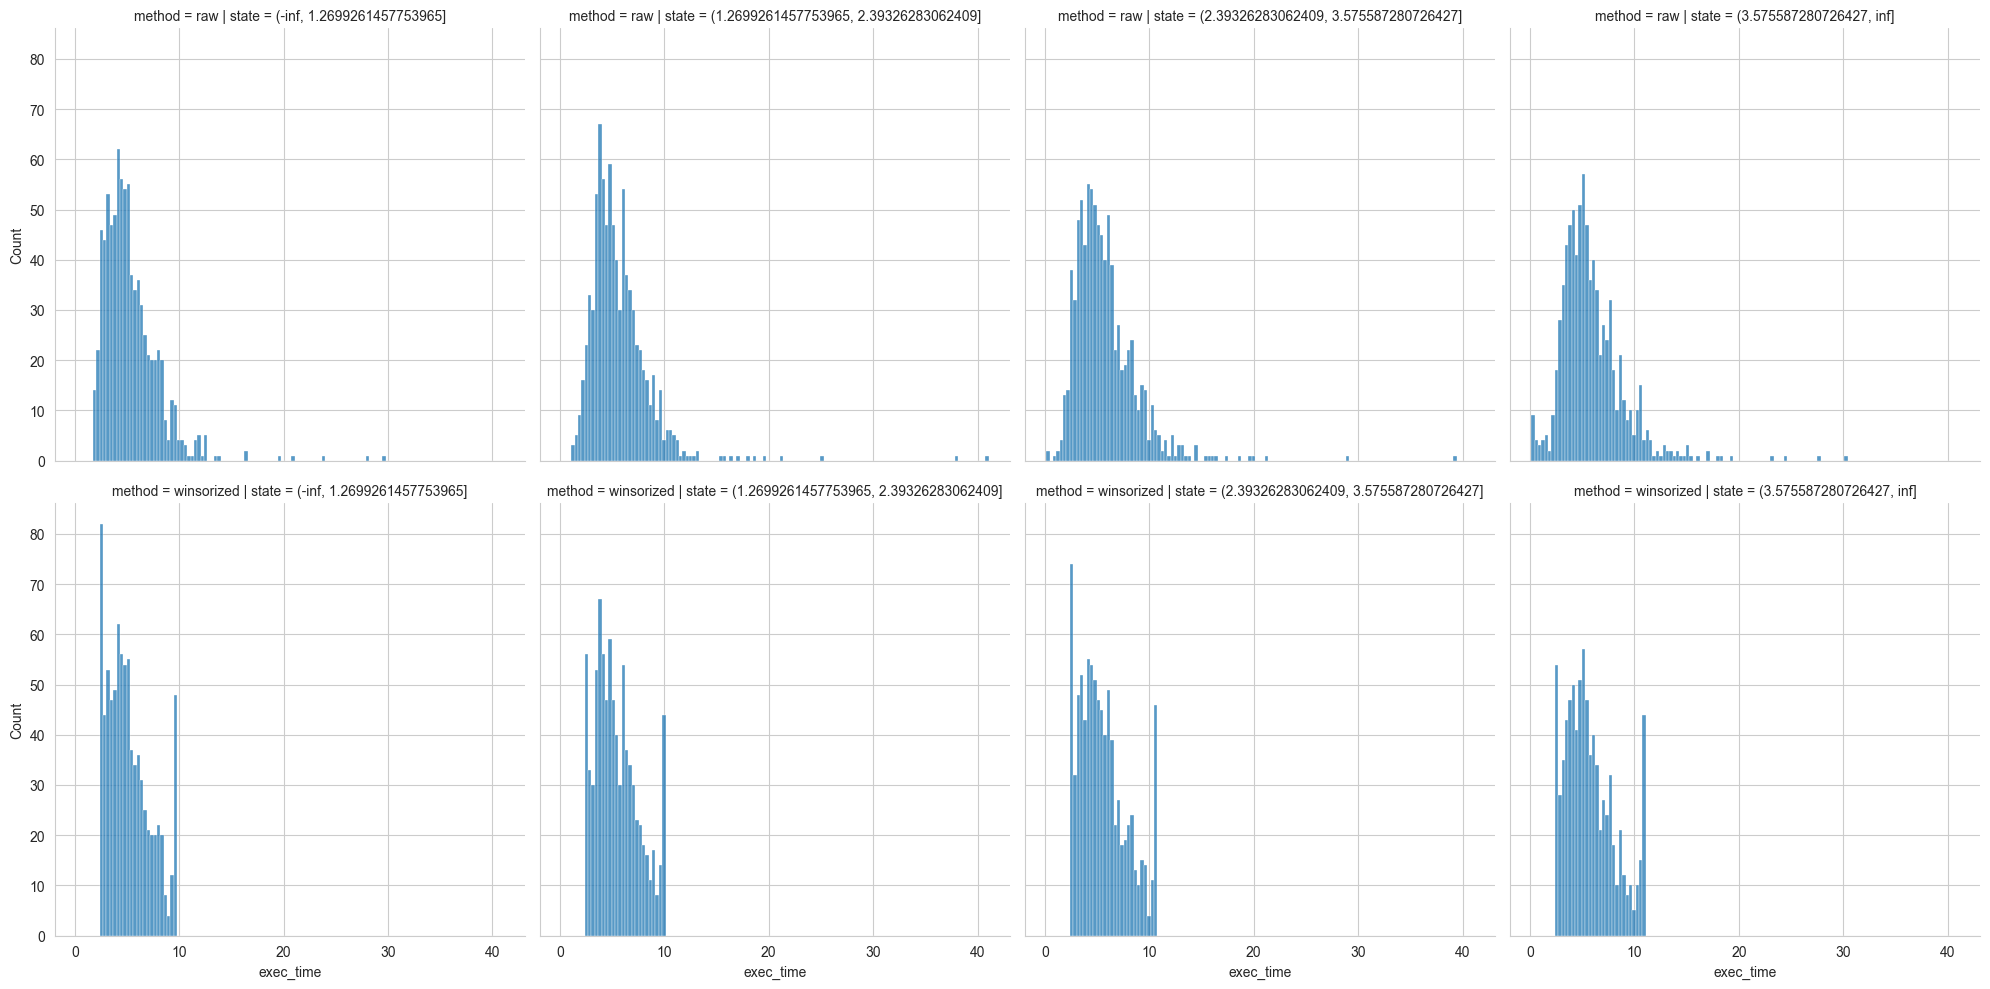

In [10]:
sns.displot(data=all_data, x="exec_time", col="state", row="method", kind="hist")
plt.show()

In [13]:
desc["method"] = "raw"
win_desc["method"] = "winsorized"

all_desc = pd.concat((desc, win_desc))
all_desc["method"] = all_desc["method"].astype("category")

all_desc

,state,stat,value,method
0,"(-inf, 1.2699261457753965]",mean,5.345496,raw
1,"(-inf, 1.2699261457753965]",50%,4.799264,raw
2,"(1.2699261457753965, 2.39326283062409]",mean,5.677823,raw
3,"(1.2699261457753965, 2.39326283062409]",50%,5.104937,raw
4,"(2.39326283062409, 3.575587280726427]",mean,5.730882,raw
5,"(2.39326283062409, 3.575587280726427]",50%,5.140988,raw
6,"(3.575587280726427, inf]",mean,5.928326,raw
7,"(3.575587280726427, inf]",50%,5.296002,raw
0,"(-inf, 1.2699261457753965]",mean,5.192728,winsorized
1,"(-inf, 1.2699261457753965]",50%,4.799264,winsorized


/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/molguin/.venvs/EdgeDroid/lib/python3.11/site-packages/seaborn/categorical.py:641:

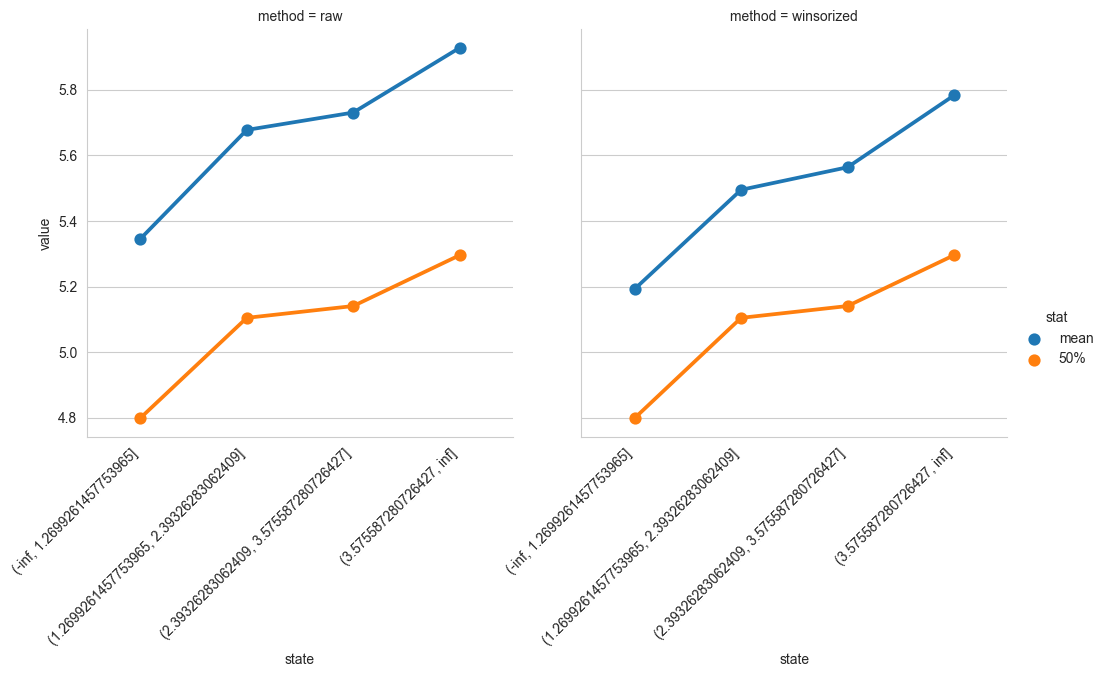

In [15]:
fg = sns.catplot(all_desc, x="state", y="value", hue="stat", col="method", kind="point")
for ax in fg.axes.flat:
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
plt.show()